# "Risk Mitigation through EDA: Unveiling Patterns in Client Payment Behavior for Informed Lending Decisions in Banking Sector"

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [2]:
# Load datasets
previous_application = pd.read_csv('previous_application.csv')
application_data = pd.read_csv('application_data.csv')

In [3]:
# Display the first few rows of each dataset
print("Previous Application Data:")
previous_application.head()


Previous Application Data:


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("\nApplication Data:")
application_data.head()


Application Data:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Dropping Unnecessary Columns

In [5]:
# Drop unnecessary columns in previous applications dataset
unnecessary_cols_previous = [
    'SK_ID_PREV', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA'
]
previous_application = previous_application.drop(unnecessary_cols_previous, axis=1)

# Drop unnecessary columns in application data dataset
unnecessary_cols_app = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]
application_data = application_data.drop(unnecessary_cols_app, axis=1)

# Display the remaining columns in each dataset
print("Remaining columns in Previous Applications Data:")
print(previous_application.columns)

print("\nRemaining columns in Application Data:")
print(application_data.columns)

Remaining columns in Previous Applications Data:
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Remaining columns in Application Data:
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALT

## Handling Missing Values in both datasets

In [6]:
# Check for missing values in previous_application dataset
print("Missing values in Previous Applications Data:")
print(previous_application.isnull().sum())

# Check for missing values in application_data dataset
print("\nMissing values in Application Data:")
print(application_data.isnull().sum())


Missing values in Previous Applications Data:
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
RATE_DOWN_PAYMENT              895844
RATE_INTEREST_PRIMARY         1664263
RATE_INTEREST_PRIVILEGED      1664263
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME

## Detecting Outliers

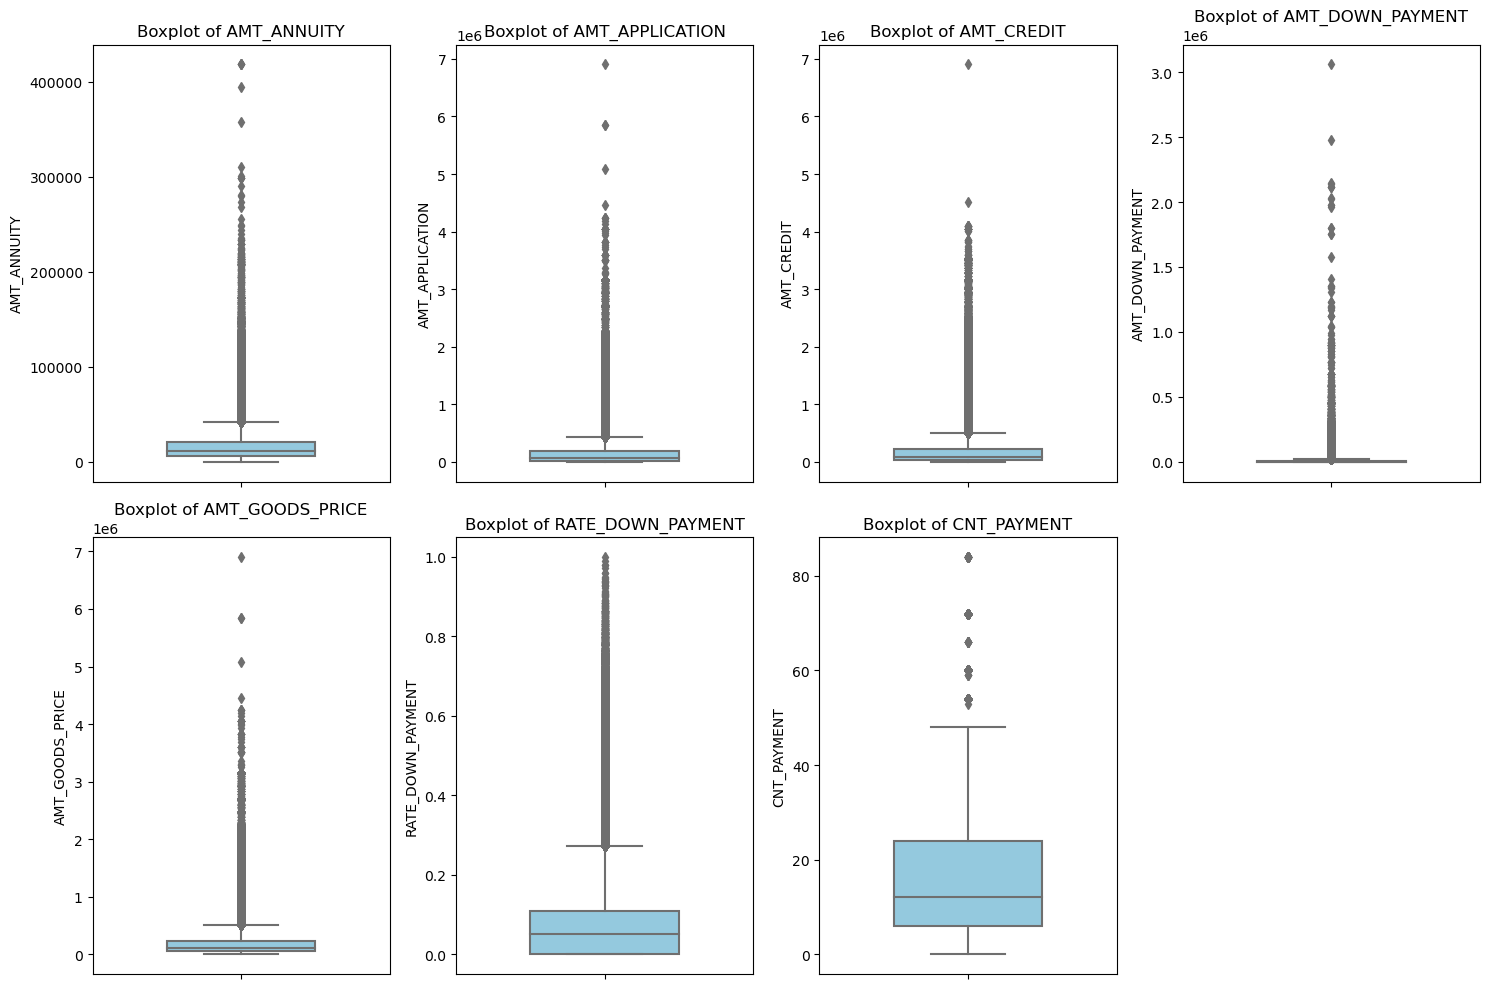

In [7]:
# Columns to check for outliers in previous_application data
columns_to_check_previous = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT']

# Create individual box plots for each column in previous_application data
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check_previous, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=previous_application[column], color='skyblue', width=0.5)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()




In [8]:
# Impute numerical columns
numerical_cols_previous = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
                            'RATE_DOWN_PAYMENT', 'CNT_PAYMENT']

for col in numerical_cols_previous:
    previous_application[col].fillna(previous_application[col].median(), inplace=True)

# Impute categorical columns
categorical_cols_previous = ['NAME_TYPE_SUITE', 'PRODUCT_COMBINATION']
for col in categorical_cols_previous:
    previous_application[col].fillna(previous_application[col].mode()[0], inplace=True)

# Drop columns with a high percentage of missing values
columns_to_drop_previous = ['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']
previous_application = previous_application.drop(columns=columns_to_drop_previous, axis=1)

# Check again for missing values
print("Missing values in Previous Applications Data after imputation:")
print(previous_application.isnull().sum())


Missing values in Previous Applications Data after imputation:
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                        0
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT                   0
AMT_GOODS_PRICE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
RATE_DOWN_PAYMENT                  0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_TYPE_SUITE                    0
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                        0
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                0
DAYS_FIRST_D

In [9]:
# Impute missing values in days-related columns with zero
days_columns_previous = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
                          'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

previous_application[days_columns_previous] = previous_application[days_columns_previous].fillna(0)

# Check again for missing values
print("Missing values in Previous Applications Data after handling days-related columns:")
print(previous_application.isnull().sum())


Missing values in Previous Applications Data after handling days-related columns:
SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
AMT_ANNUITY                   0
AMT_APPLICATION               0
AMT_CREDIT                    0
AMT_DOWN_PAYMENT              0
AMT_GOODS_PRICE               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
RATE_DOWN_PAYMENT             0
NAME_CASH_LOAN_PURPOSE        0
NAME_CONTRACT_STATUS          0
DAYS_DECISION                 0
NAME_PAYMENT_TYPE             0
CODE_REJECT_REASON            0
NAME_TYPE_SUITE               0
NAME_CLIENT_TYPE              0
NAME_GOODS_CATEGORY           0
NAME_PORTFOLIO                0
NAME_PRODUCT_TYPE             0
CHANNEL_TYPE                  0
NAME_SELLER_INDUSTRY          0
CNT_PAYMENT                   0
NAME_YIELD_GROUP              0
PRODUCT_COMBINATION           0
DAYS_FIRST_DRAWING            0
DAYS_FIRST_DUE                0
DAYS_LAST_DUE_1ST_VERSION     0
DAYS_LAST_DUE         

In [10]:
# Check for missing values in application_data dataset
print("Missing values in Application Data:")
print(application_data.isnull().sum())


Missing values in Application Data:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 94, dtype: int64


In [11]:
# Check for missing values in application_data
missing_values = application_data.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)


AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [12]:
# Impute missing values in numerical columns with mean or median
numerical_cols_app = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
    'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
    'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
    'TOTALAREA_MODE'
]

for col in numerical_cols_app:
    application_data[col].fillna(application_data[col].median(), inplace=True)

# Impute missing values in categorical columns with mode
categorical_cols_app = [
    'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

for col in categorical_cols_app:
    application_data[col].fillna(application_data[col].mode()[0], inplace=True)

# Check again for missing values
print("Missing values in Application Data after imputation:")
print(application_data.isnull().sum())


Missing values in Application Data after imputation:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 94, dtype: int64


In [13]:
#Imute the Amount category columns with mean, median 
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)


In [14]:
# Check again for missing values
print("Missing values in Application Data after imputation:")
print(application_data.isnull().sum())

Missing values in Application Data after imputation:
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 94, dtype: int64


In [15]:
# Replace "XNA" or "XAP" in the gender column with the mode
application_data['CODE_GENDER'].replace(['XNA', 'XAP'], application_data['CODE_GENDER'].mode()[0], inplace=True)

# Check the unique values in the gender column
print("Unique values in CODE_GENDER column after imputation:")
print(application_data['CODE_GENDER'].unique())


Unique values in CODE_GENDER column after imputation:
['M' 'F']


In [16]:
# Replace missing or unusual values in the 'ORGANIZATION_TYPE' column with the mode
application_data['ORGANIZATION_TYPE'].replace(['XNA'], application_data['ORGANIZATION_TYPE'].mode()[0], inplace=True)

# Check the unique values in the 'ORGANIZATION_TYPE' column
print("Unique values in ORGANIZATION_TYPE column after imputation:")
print(application_data['ORGANIZATION_TYPE'].unique())


Unique values in ORGANIZATION_TYPE column after imputation:
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6']


## Finding and fixing XNA and XAP values 

In [17]:
# Check 'XNA' or 'XAP' values in previous_application dataset
xna_xap_counts_previous = {}
for column in previous_application.columns:
    xna_xap_counts_previous[column] = previous_application[column].isin(['XNA', 'XAP']).sum()

# Check 'XNA' or 'XAP' values in application_data dataset
xna_xap_counts_application = {}
for column in application_data.columns:
    xna_xap_counts_application[column] = application_data[column].isin(['XNA', 'XAP']).sum()

# Display the counts
# Display the counts
print("Counts of 'XNA' or 'XAP' values in Previous Application Data:")
print(xna_xap_counts_previous)

print("\nCounts of 'XNA' or 'XAP' values in Application Data:")
print(xna_xap_counts_application)



Counts of 'XNA' or 'XAP' values in Previous Application Data:
{'SK_ID_CURR': 0, 'NAME_CONTRACT_TYPE': 346, 'AMT_ANNUITY': 0, 'AMT_APPLICATION': 0, 'AMT_CREDIT': 0, 'AMT_DOWN_PAYMENT': 0, 'AMT_GOODS_PRICE': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'RATE_DOWN_PAYMENT': 0, 'NAME_CASH_LOAN_PURPOSE': 1600579, 'NAME_CONTRACT_STATUS': 0, 'DAYS_DECISION': 0, 'NAME_PAYMENT_TYPE': 627384, 'CODE_REJECT_REASON': 1358337, 'NAME_TYPE_SUITE': 0, 'NAME_CLIENT_TYPE': 1941, 'NAME_GOODS_CATEGORY': 950809, 'NAME_PORTFOLIO': 372230, 'NAME_PRODUCT_TYPE': 1063666, 'CHANNEL_TYPE': 0, 'NAME_SELLER_INDUSTRY': 855720, 'CNT_PAYMENT': 0, 'NAME_YIELD_GROUP': 517215, 'PRODUCT_COMBINATION': 0, 'DAYS_FIRST_DRAWING': 0, 'DAYS_FIRST_DUE': 0, 'DAYS_LAST_DUE_1ST_VERSION': 0, 'DAYS_LAST_DUE': 0, 'DAYS_TERMINATION': 0, 'NFLAG_INSURED_ON_APPROVAL': 0}

Counts of 'XNA' or 'XAP' values in Application Data:
{'SK_ID_CURR': 0, 'TARGET': 0, 'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLA

## Handling XNA or XAP values in previous_application

In [18]:
# Replace 'XNA' or 'XAP' with NaN ()
previous_application.replace(['XNA', 'XAP'], np.nan, inplace=True)

# Handle missing values dropping columns with more than 30% missing values)
threshold = 0.3
previous_application = previous_application.dropna(thresh=len(previous_application) * (1 - threshold), axis=1)


In [19]:
# Check 'XNA' or 'XAP' values along with NaN in Previous Application Data
xna_xap_counts = {}
for column in previous_application.columns:
    xna_count = previous_application[column].eq('XNA').sum()
    xap_count = previous_application[column].eq('XAP').sum()
    nan_count = previous_application[column].isna().sum()
    xna_xap_counts[column] = {'XNA': xna_count, 'XAP': xap_count, 'NaN': nan_count}

# Display the counts
print("Counts of 'XNA' or 'XAP' values in Previous Application Data after handling NaN:")
print(xna_xap_counts)


Counts of 'XNA' or 'XAP' values in Previous Application Data after handling NaN:
{'SK_ID_CURR': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'NAME_CONTRACT_TYPE': {'XNA': 0, 'XAP': 0, 'NaN': 346}, 'AMT_ANNUITY': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'AMT_APPLICATION': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'AMT_CREDIT': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'AMT_DOWN_PAYMENT': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'AMT_GOODS_PRICE': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'WEEKDAY_APPR_PROCESS_START': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'HOUR_APPR_PROCESS_START': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'RATE_DOWN_PAYMENT': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'NAME_CONTRACT_STATUS': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'DAYS_DECISION': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'NAME_TYPE_SUITE': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'NAME_CLIENT_TYPE': {'XNA': 0, 'XAP': 0, 'NaN': 1941}, 'NAME_PORTFOLIO': {'XNA': 0, 'XAP': 0, 'NaN': 372230}, 'CHANNEL_TYPE': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'CNT_PAYMENT': {'XNA': 0, 'XAP': 0, 'NaN': 0}, 'PRODUCT_COMBINATION': {'XNA': 0, 

## Merge the data after Data Cleaning

In [20]:
# Merge datasets
merged_data = pd.merge(application_data, previous_application, on='SK_ID_CURR', how='inner')

# Display the merged dataset
print("Merged Data:")
# Display the first few rows of the merged dataset in a table
merged_data.head()



Merged Data:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,POS,Stone,24.0,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash,Credit and cash offices,12.0,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,Stone,6.0,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,Country-wide,12.0,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,POS,Regional / Local,4.0,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


## Convert negative values to absolute values in the merged dataset

In [21]:
# Identify numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns

# Convert negative values to absolute values in numeric columns
merged_data[numeric_columns] = merged_data[numeric_columns].abs()

# Display the first few rows of the updated merged dataset
print("Updated Merged Data with Absolute Values:")
print(merged_data.head())

Updated Merged Data with Absolute Values:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_PORTFOLIO             CHANNEL_TYPE CNT_PAYMENT  \
0        24700.5  ...             POS             

In [22]:
# Find null values in the merged dataset
null_values = merged_data.isnull().sum()

# Display the count of null values for each column
print("Null Values in Merged Data:")
print(null_values)

Null Values in Merged Data:
SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE_x         0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                            ..
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
Length: 117, dtype: int64


## Modified merged_data

In [23]:
print("Modified Merged Data with Absolute Values:")
merged_data.head()

Modified Merged Data with Absolute Values:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,POS,Stone,24.0,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash,Credit and cash offices,12.0,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,Stone,6.0,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,Country-wide,12.0,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,POS,Regional / Local,4.0,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


## Statistical information

In [24]:
# Display summary statistics for numeric columns
summary_stats = merged_data.describe()

# Display the summary statistics
print("Summary Statistics for Merged Data:")
print(summary_stats)


Summary Statistics for Merged Data:
         SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413701e+06       1.413701e+06   
mean   5.875537e+05   2.701688e+04       5.276522e+05   
std    3.849173e+05   1.395072e+04       3.531028e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   


In [25]:
merged_data.shape

(1413701, 117)

## Univariate analysis 

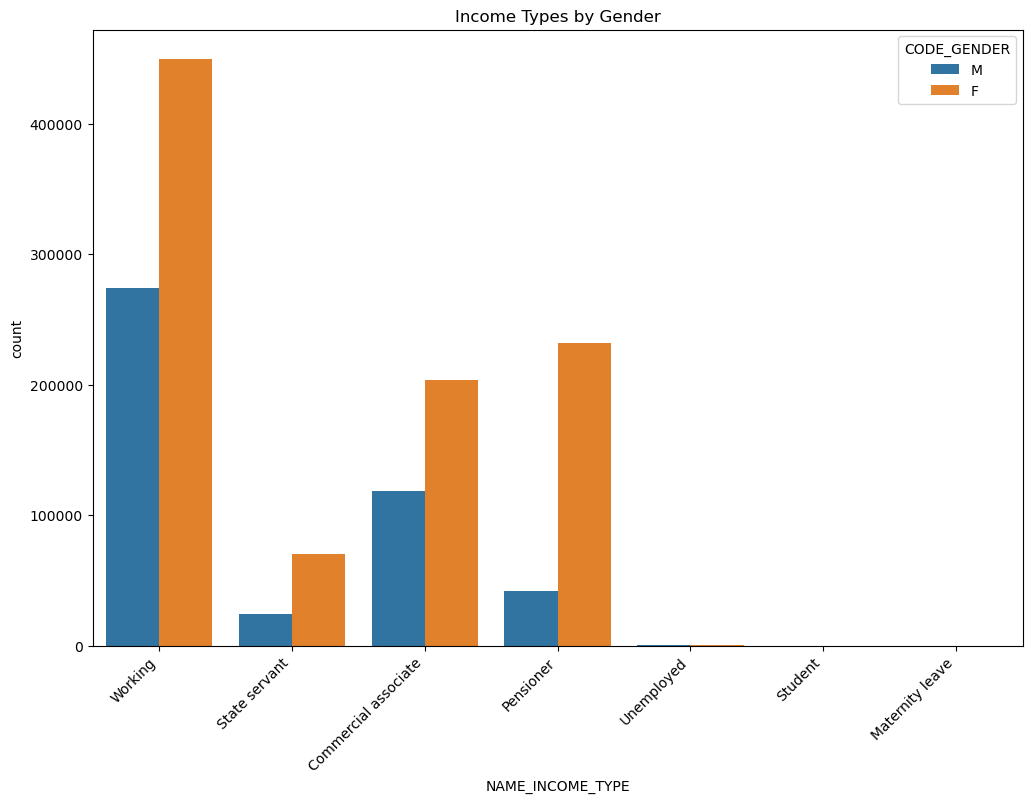

In [26]:
# Countplot for income types by gender
plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_INCOME_TYPE', hue='CODE_GENDER', data=merged_data)
plt.title('Income Types by Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

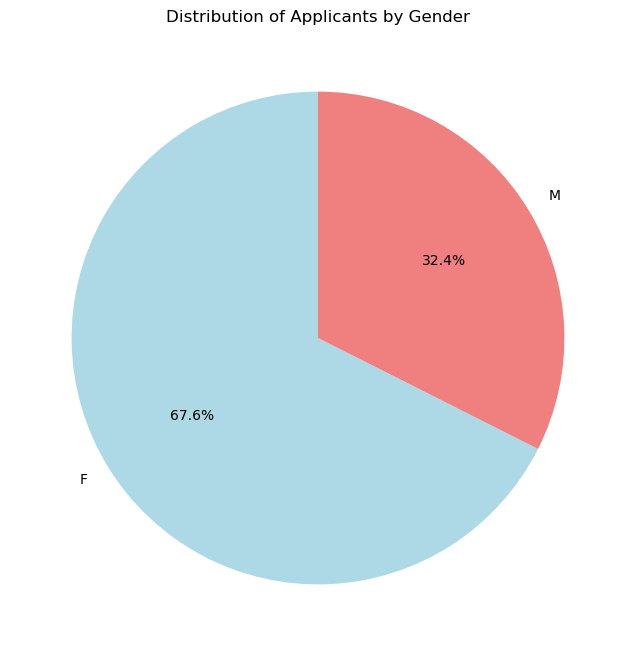

In [27]:
# Pie chart for gender distribution
gender_counts = merged_data['CODE_GENDER'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Applicants by Gender')
plt.show()


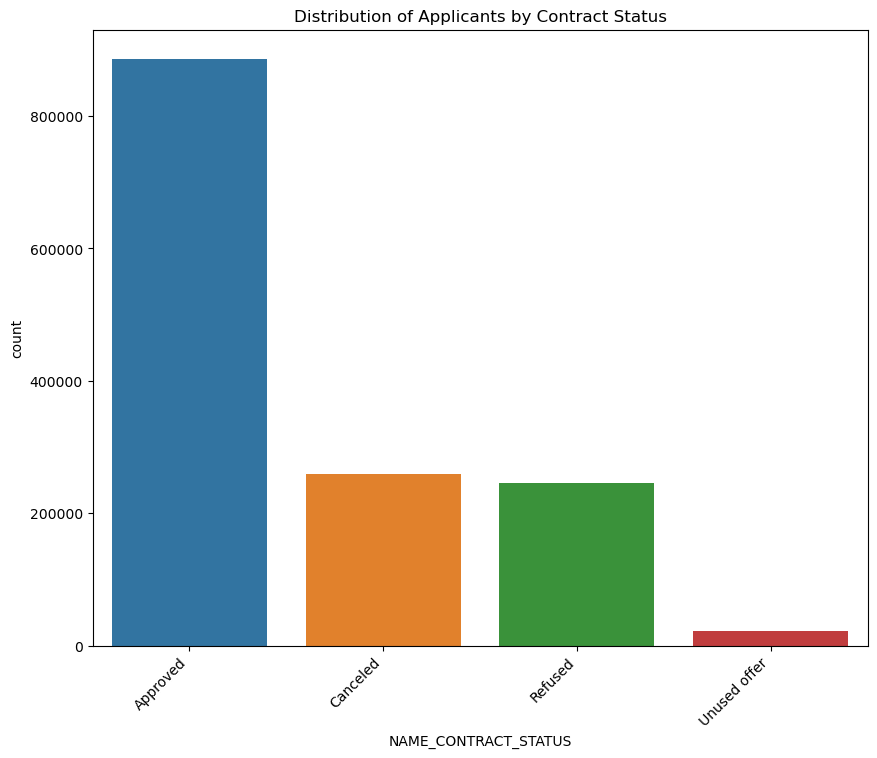

In [28]:
# Countplot for contract status distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='NAME_CONTRACT_STATUS', data=merged_data)
plt.title('Distribution of Applicants by Contract Status')
plt.xticks(rotation=45, ha='right')
plt.show()

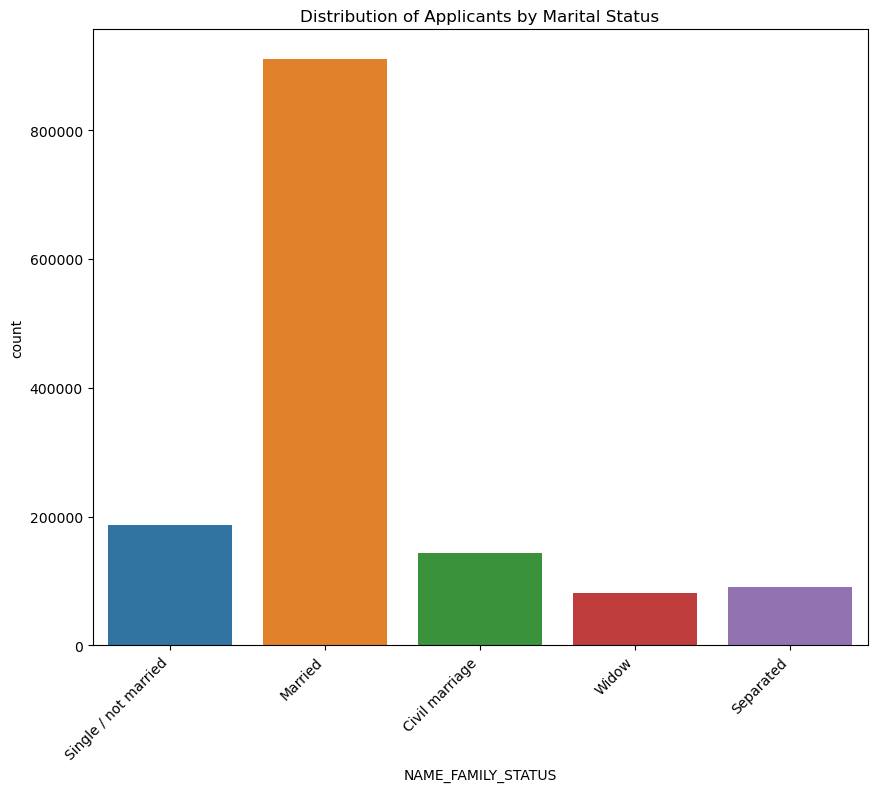

In [29]:
# Countplot for marital status distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='NAME_FAMILY_STATUS', data=merged_data)
plt.title('Distribution of Applicants by Marital Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

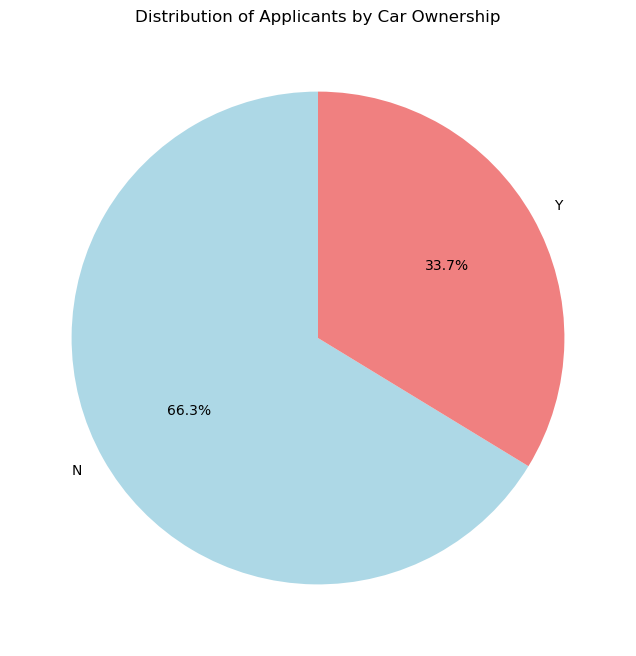

In [30]:
# Pie chart for car ownership distribution
car_ownership_counts = merged_data['FLAG_OWN_CAR'].value_counts()
labels = car_ownership_counts.index
sizes = car_ownership_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Applicants by Car Ownership')
plt.show()

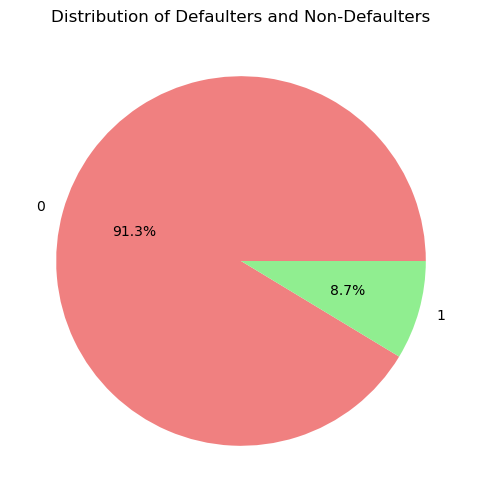

In [31]:
# Count the number of defaulters and non-defaulters
target_counts = merged_data['TARGET'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Defaulters and Non-Defaulters')
plt.show()


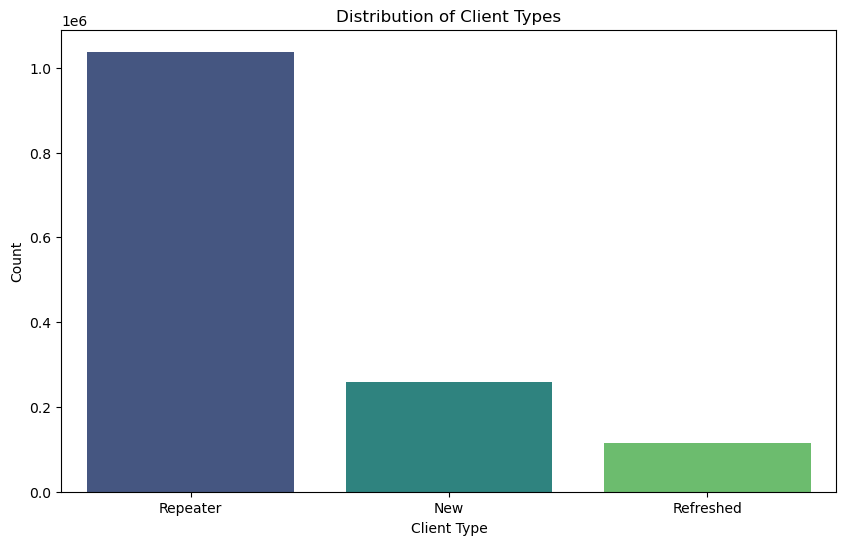

In [32]:
# Count the number of each client type
client_type_counts = merged_data['NAME_CLIENT_TYPE'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=client_type_counts.index, y=client_type_counts, palette='viridis')
plt.title('Distribution of Client Types')
plt.xlabel('Client Type')
plt.ylabel('Count')
plt.show()


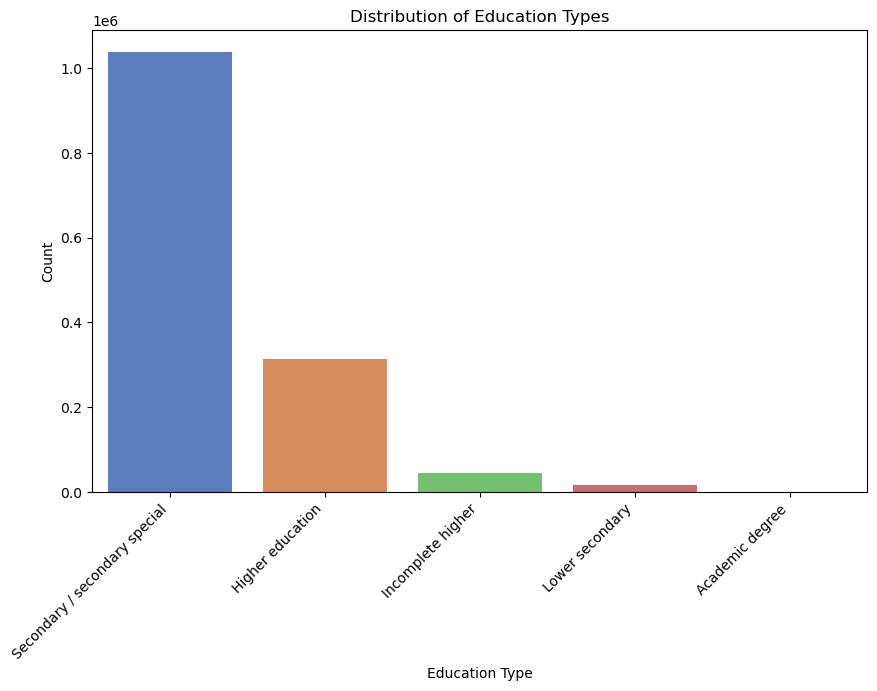

In [33]:
# Count the number of each education type
education_type_counts = merged_data['NAME_EDUCATION_TYPE'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=education_type_counts.index, y=education_type_counts, palette='muted')
plt.title('Distribution of Education Types')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


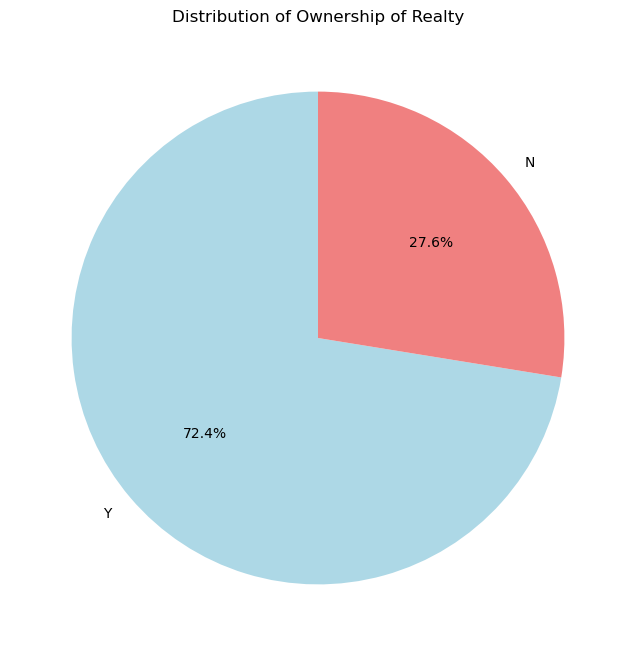

In [34]:
# Pie chart for ownership of realty
realty_counts = merged_data['FLAG_OWN_REALTY'].value_counts()
labels = realty_counts.index
sizes = realty_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Ownership of Realty')
plt.show()


## BiVariate Analysis

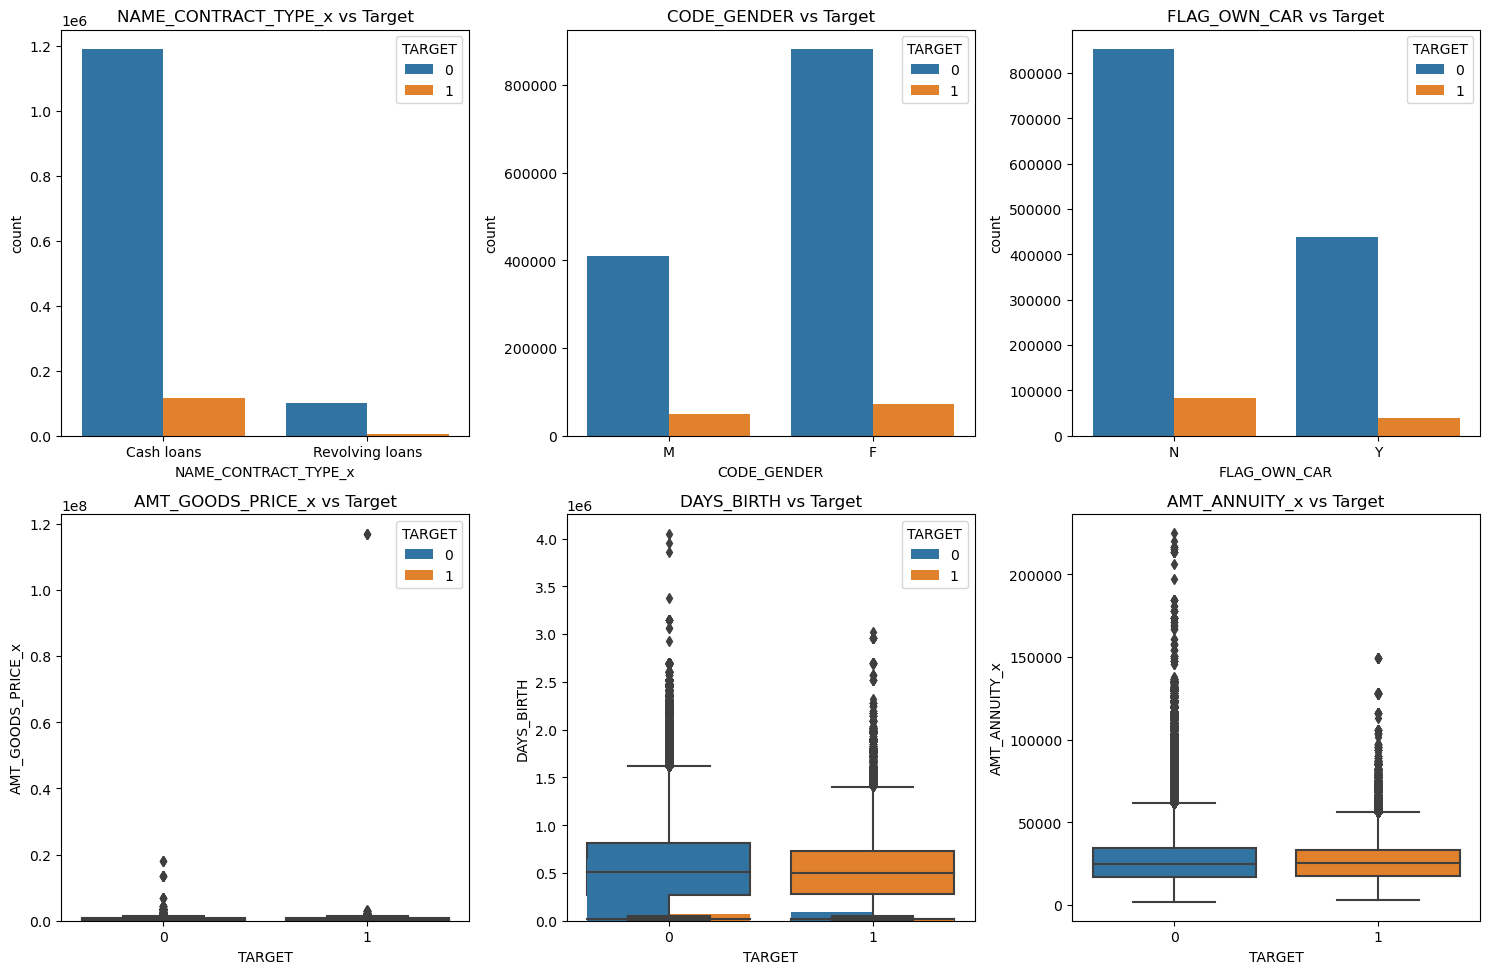

In [35]:
# Categorical variables
categorical_variables = ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE']

# Numerical variables
numerical_variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_BIRTH']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Bivariate analysis for categorical variables using bar plots
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, hue='TARGET', data=merged_data, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{variable} vs Target')

# Bivariate analysis for numerical variables using box plots
for i, variable in enumerate(numerical_variables):
    sns.boxplot(x='TARGET', y=variable, data=merged_data, ax=axes[1, i%3])
    axes[1, i%3].set_title(f'{variable} vs Target')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


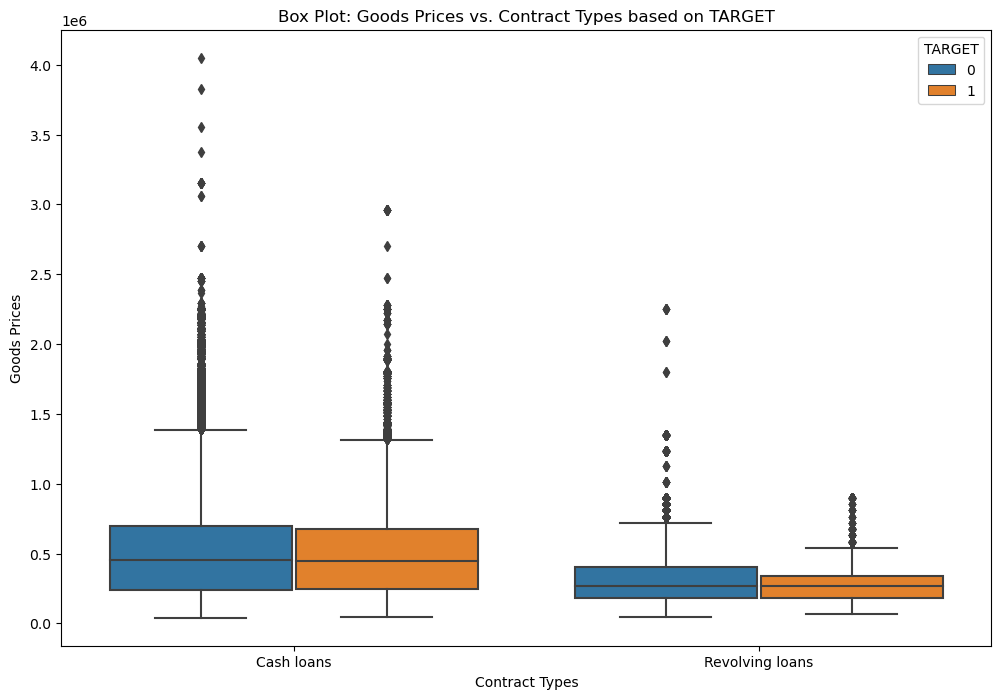

In [36]:
#Box plot for goods prices vs. contract types with hue 'TARGET'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NAME_CONTRACT_TYPE_x', y='AMT_GOODS_PRICE_x', hue='TARGET', data=merged_data)
plt.title('Box Plot: Goods Prices vs. Contract Types based on TARGET')
plt.xlabel('Contract Types')
plt.ylabel('Goods Prices')
plt.legend(title='TARGET')
plt.show()


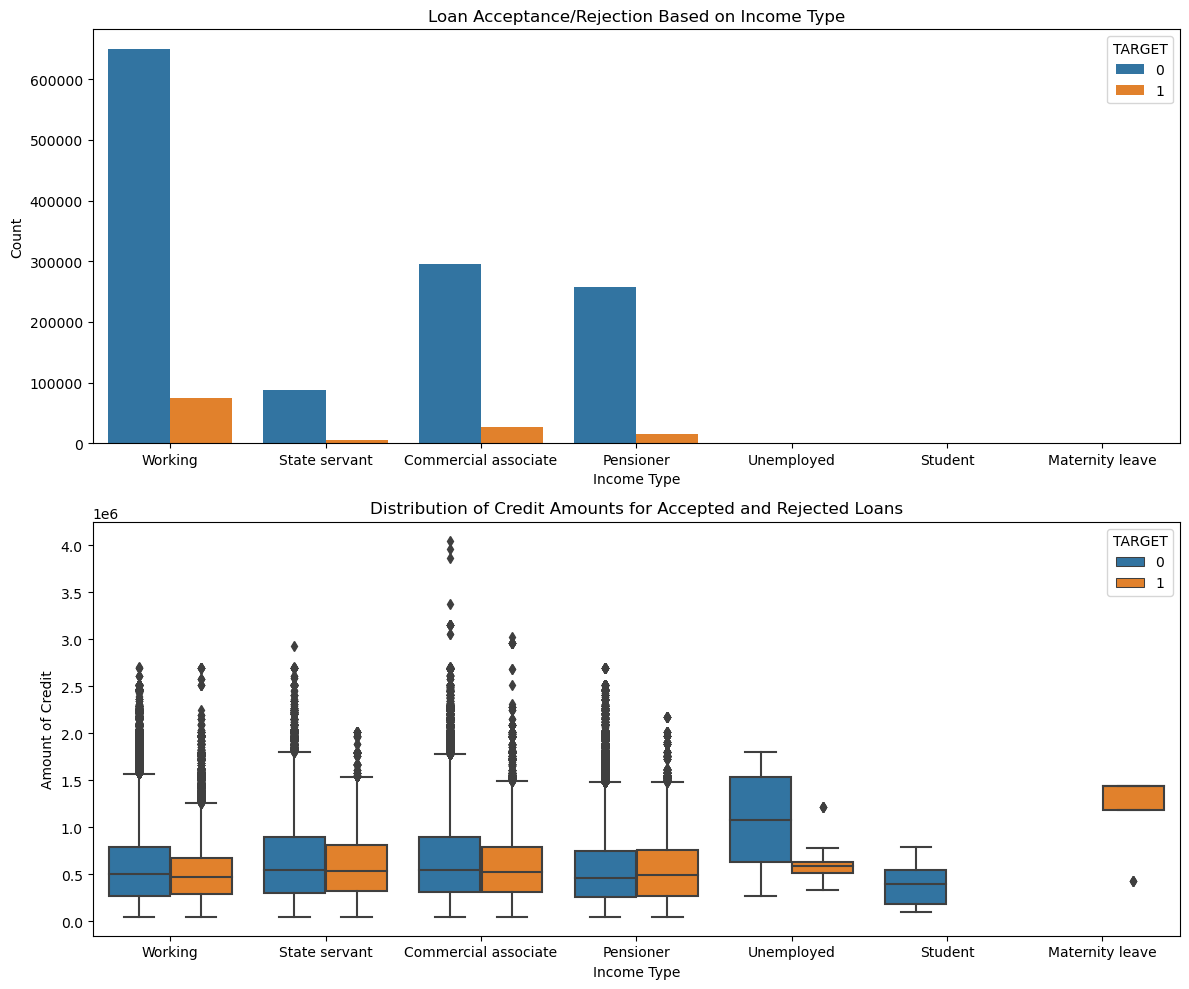

In [37]:
# Set up the figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the count of accepted and rejected loans
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=merged_data, ax=ax1)
ax1.set_xlabel('Income Type')
ax1.set_ylabel('Count')
ax1.set_title('Loan Acceptance/Rejection Based on Income Type')

# Plot the distribution of amounts for accepted loans
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT_x', hue='TARGET', data=merged_data, ax=ax2)
ax2.set_xlabel('Income Type')
ax2.set_ylabel('Amount of Credit')
ax2.set_title('Distribution of Credit Amounts for Accepted and Rejected Loans')

# Show the plots
plt.tight_layout()
plt.show()


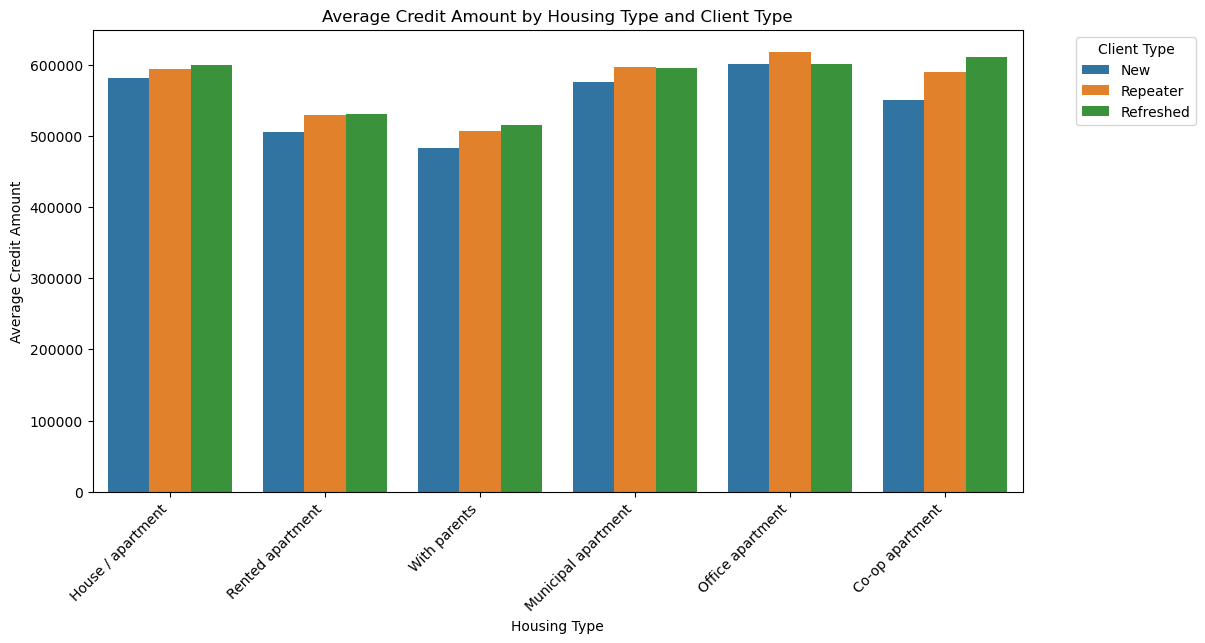

In [38]:
# Grouped bar chart for average credit amount by housing type and client type
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT_x', hue='NAME_CLIENT_TYPE', data=merged_data, ci=None)
plt.title('Average Credit Amount by Housing Type and Client Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Housing Type')
plt.ylabel('Average Credit Amount')
plt.legend(title='Client Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



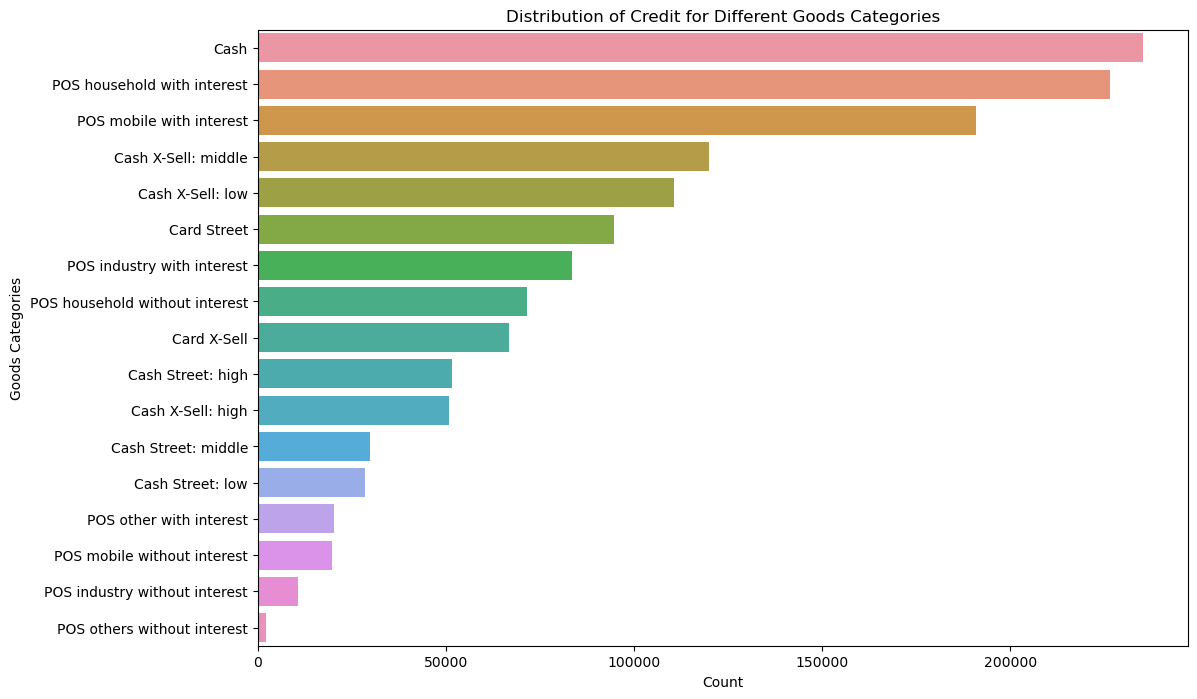

In [39]:
# Countplot for goods category distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='PRODUCT_COMBINATION', data=merged_data, order=merged_data['PRODUCT_COMBINATION'].value_counts().index)
plt.title('Distribution of Credit for Different Goods Categories')
plt.xlabel('Count')
plt.ylabel('Goods Categories')
plt.show()



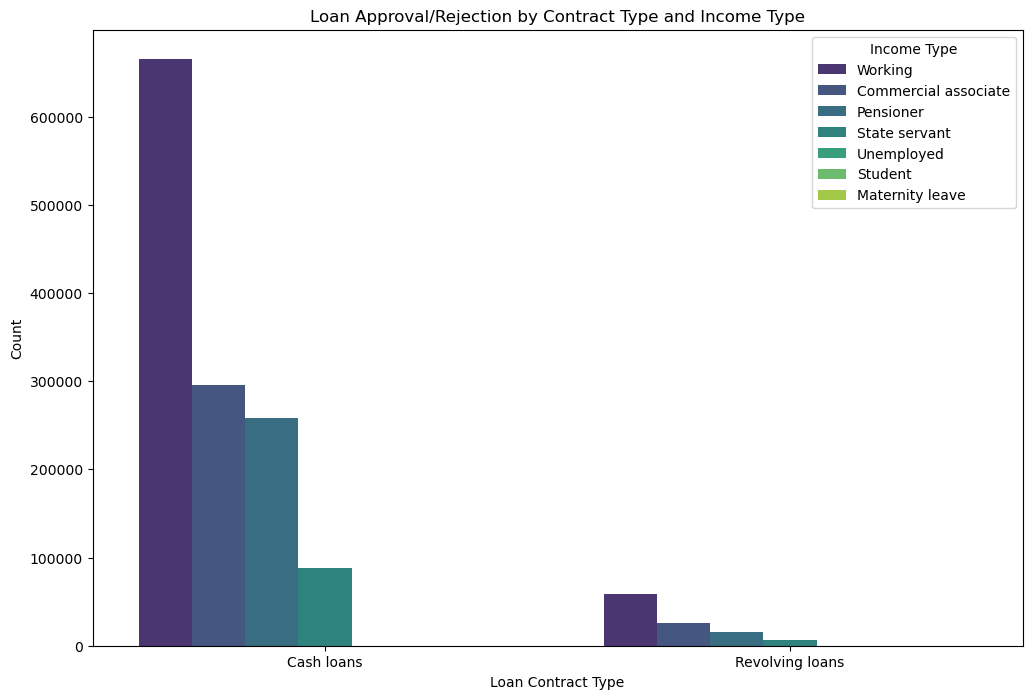

In [40]:
# Select relevant variables
selected_variables = ['NAME_CONTRACT_TYPE_x', 'NAME_INCOME_TYPE', 'TARGET']

# Subset the data
subset_data = merged_data[selected_variables]

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_CONTRACT_TYPE_x', hue='NAME_INCOME_TYPE', data=subset_data, hue_order=subset_data['NAME_INCOME_TYPE'].value_counts().index, palette='viridis')
plt.title('Loan Approval/Rejection by Contract Type and Income Type')
plt.xlabel('Loan Contract Type')
plt.ylabel('Count')
plt.legend(title='Income Type')
plt.show()


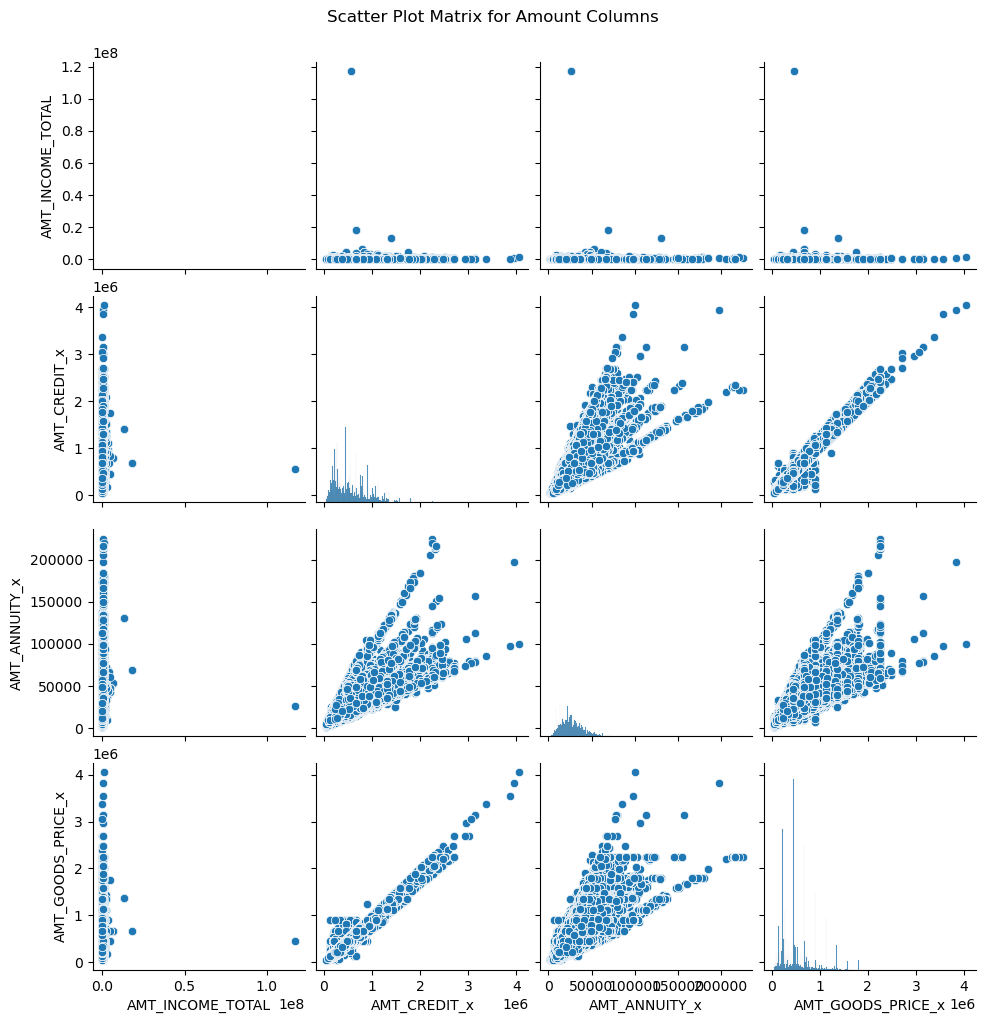

In [41]:
# Columns to include in the scatter plot matrix
amount_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']

# Scatter plot matrix
sns.pairplot(merged_data[amount_columns])
plt.suptitle('Scatter Plot Matrix for Amount Columns', y=1.02)
plt.show()


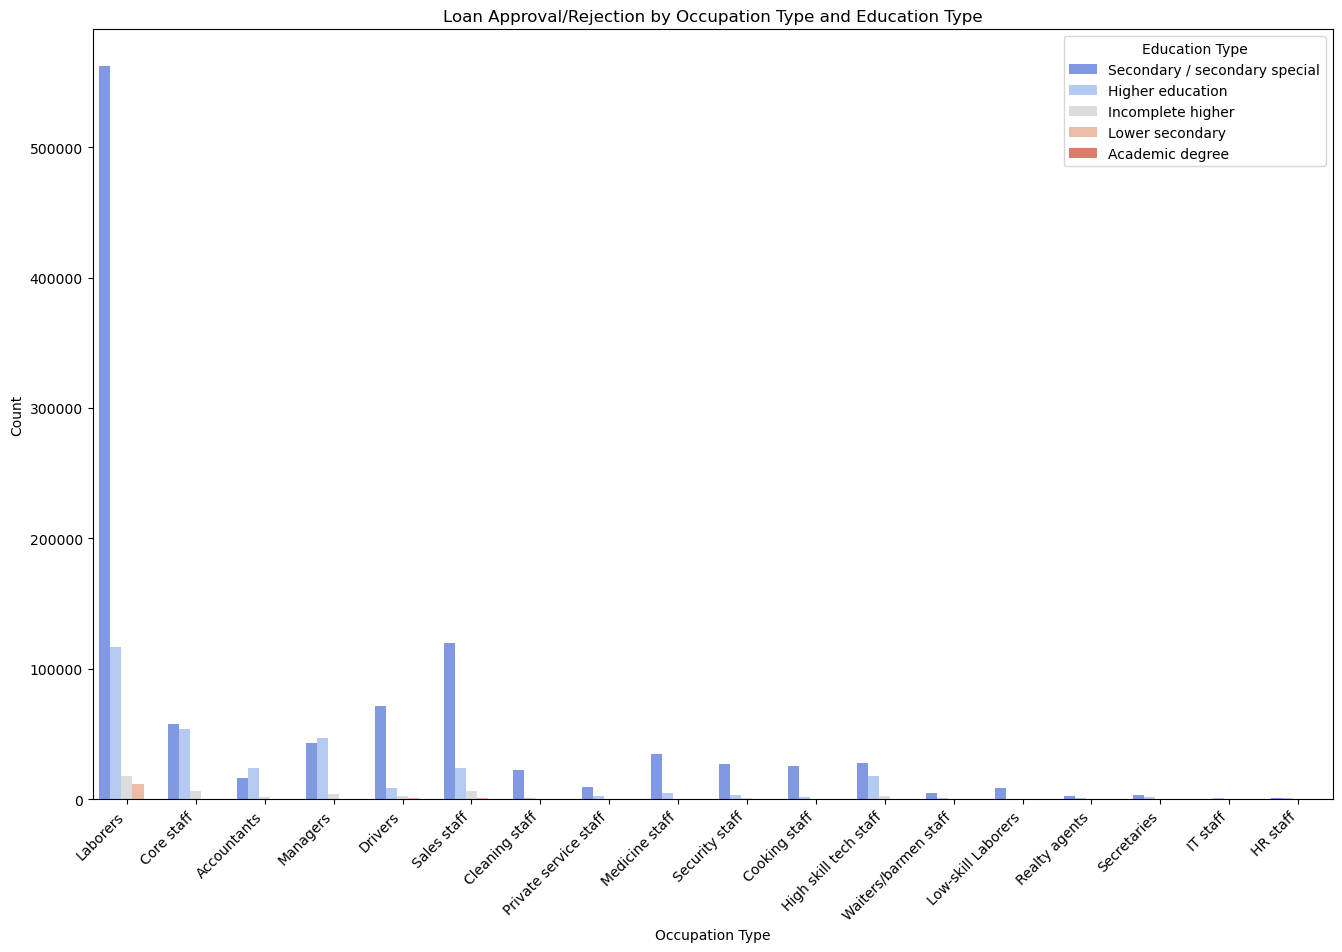

In [42]:
# Select relevant variables
selected_variables = ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'TARGET']

# Subset the data
subset_data = merged_data[selected_variables]

# Create a grouped bar chart
plt.figure(figsize=(16, 10))
sns.countplot(x='OCCUPATION_TYPE', hue='NAME_EDUCATION_TYPE', data=subset_data, hue_order=subset_data['NAME_EDUCATION_TYPE'].value_counts().index, palette='coolwarm', dodge=True)
plt.title('Loan Approval/Rejection by Occupation Type and Education Type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.legend(title='Education Type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()


## Multivariate Analysis: Correlation Heatmap

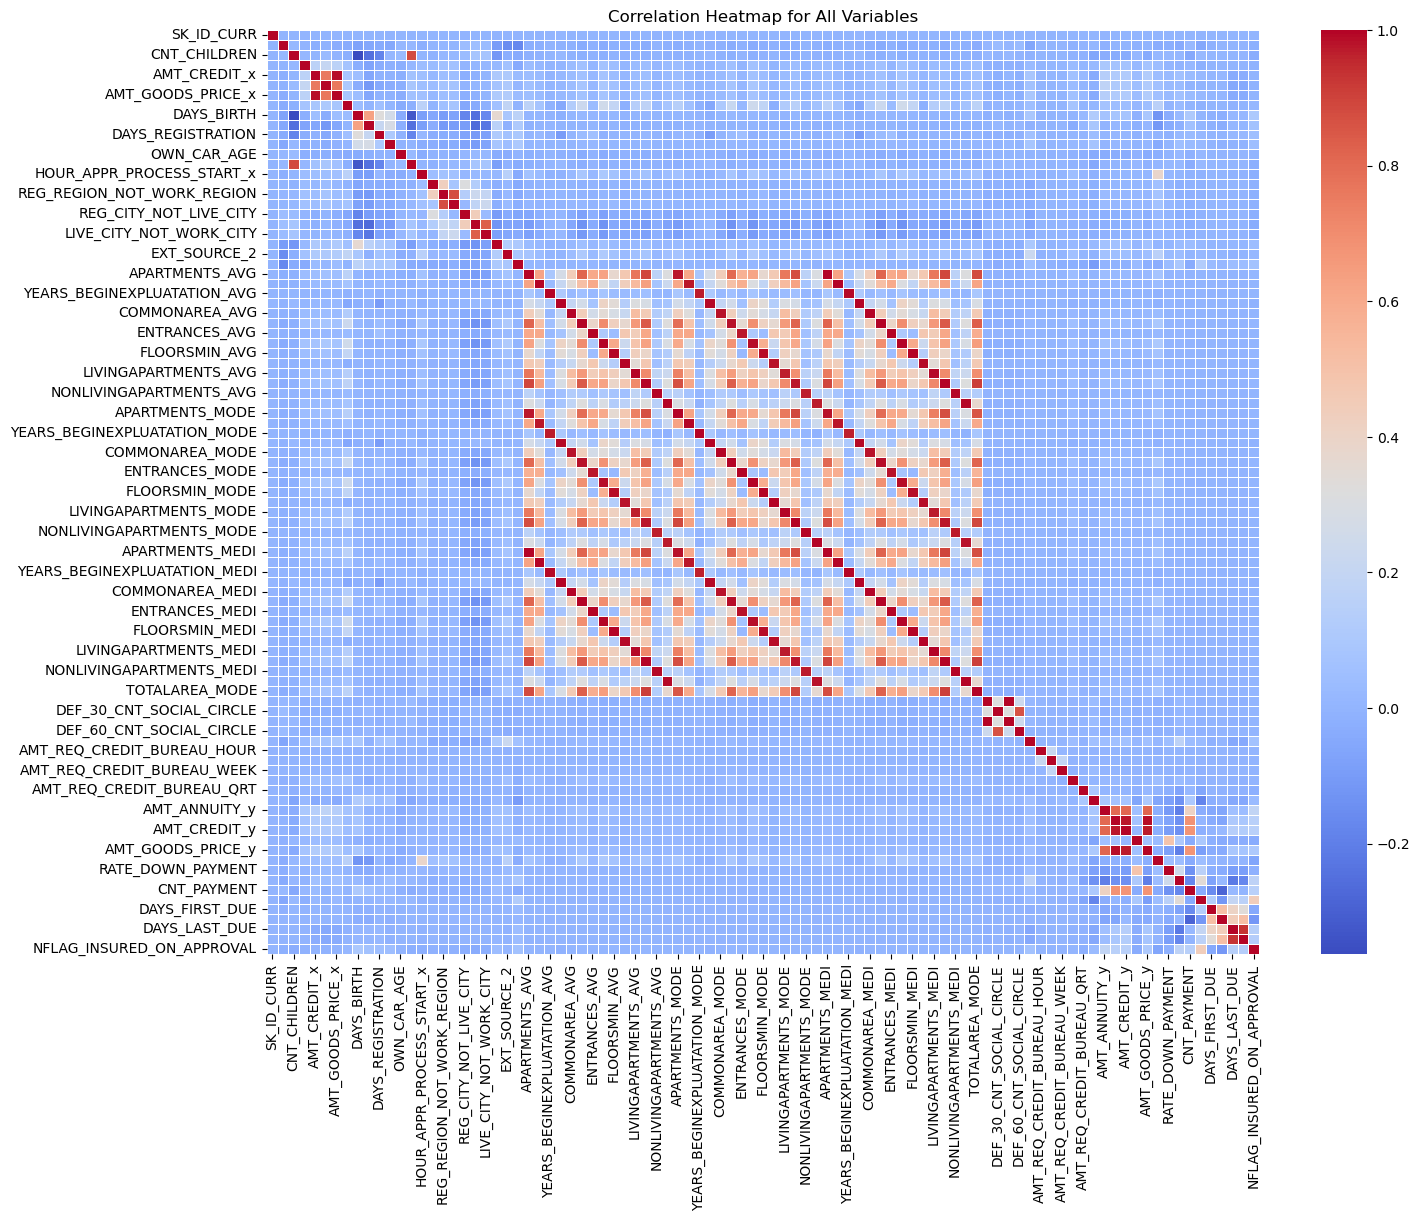

In [43]:
# Calculate the correlation matrix for the entire dataset
correlation_matrix_all = merged_data.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_all, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for All Variables')
plt.show()

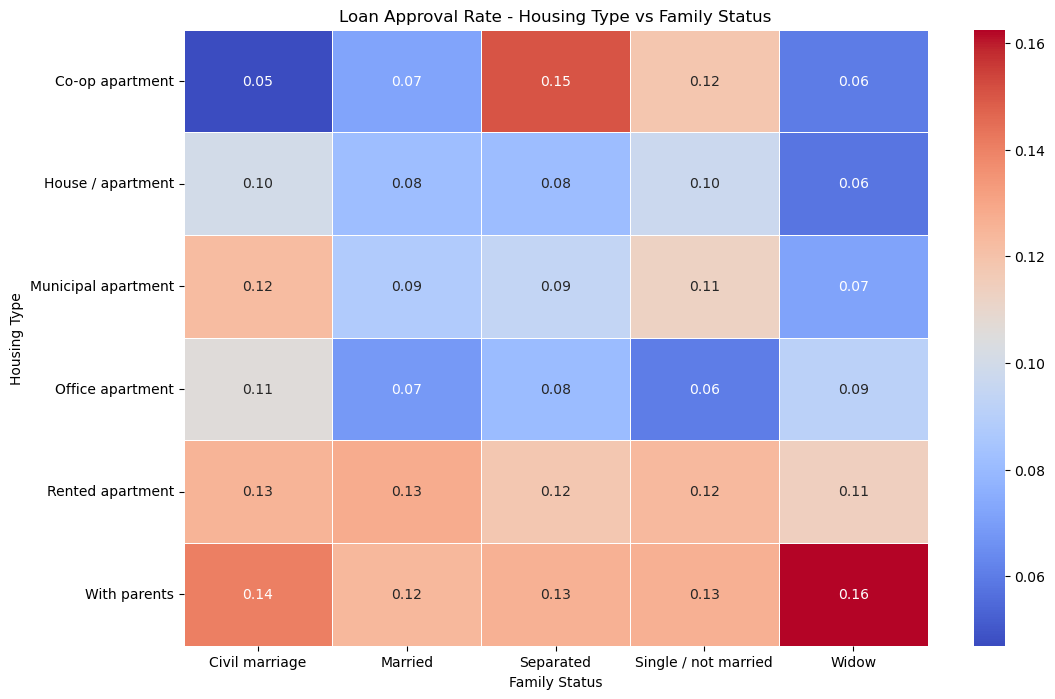

In [44]:
# Create a pivot table for better visualization
pivot_table = pd.pivot_table(merged_data, values='TARGET', index='NAME_HOUSING_TYPE', columns='NAME_FAMILY_STATUS', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Loan Approval Rate - Housing Type vs Family Status')
plt.xlabel('Family Status')
plt.ylabel('Housing Type')
plt.show()




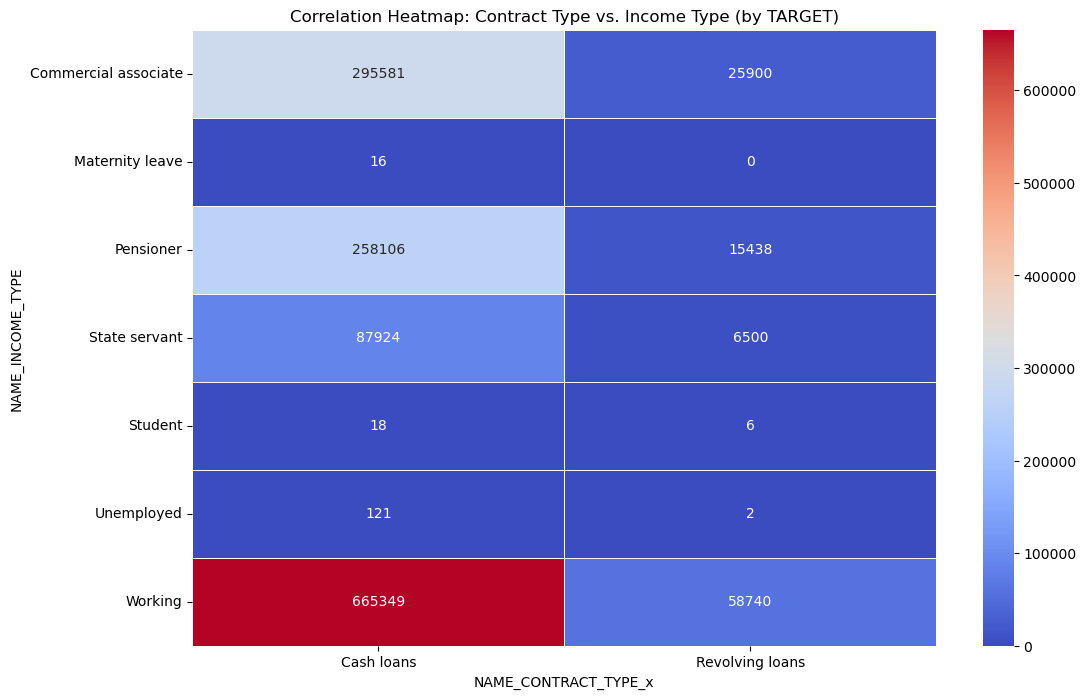

In [45]:
# Select relevant variables
selected_variables = ['NAME_CONTRACT_TYPE_x', 'NAME_INCOME_TYPE']

# Subset the data
subset_data = merged_data[selected_variables]

# Create a contingency table
contingency_table = pd.crosstab(index=subset_data['NAME_INCOME_TYPE'], columns=subset_data['NAME_CONTRACT_TYPE_x'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Correlation Heatmap: Contract Type vs. Income Type (by TARGET)')
plt.show()



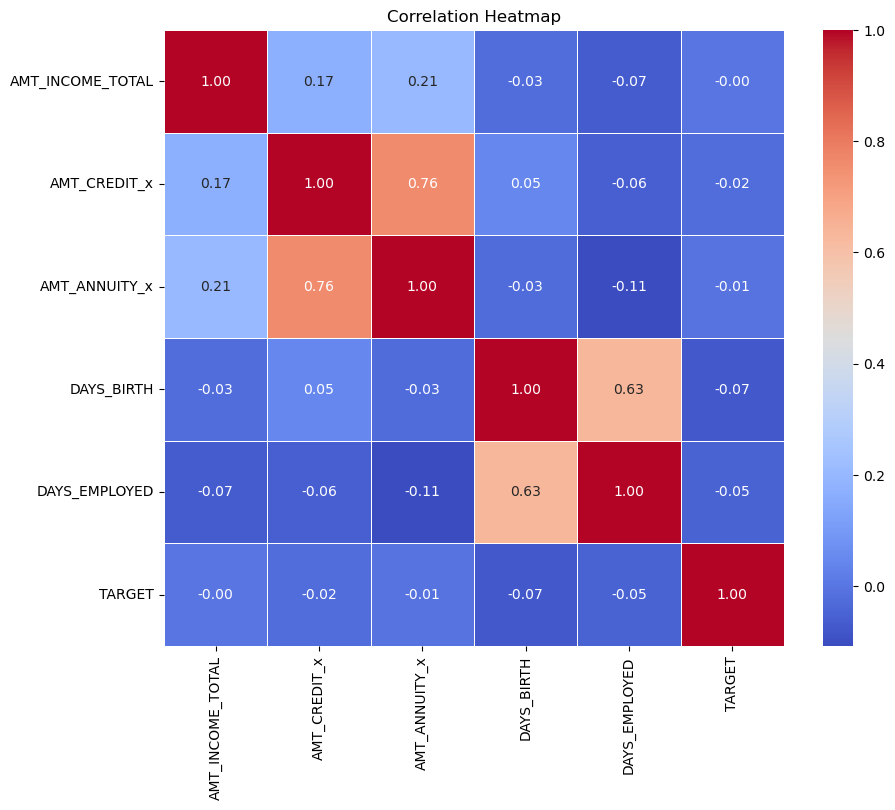

In [46]:
# Select columns for correlation analysis
selected_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'TARGET']

# Subset the data
subset_data = merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


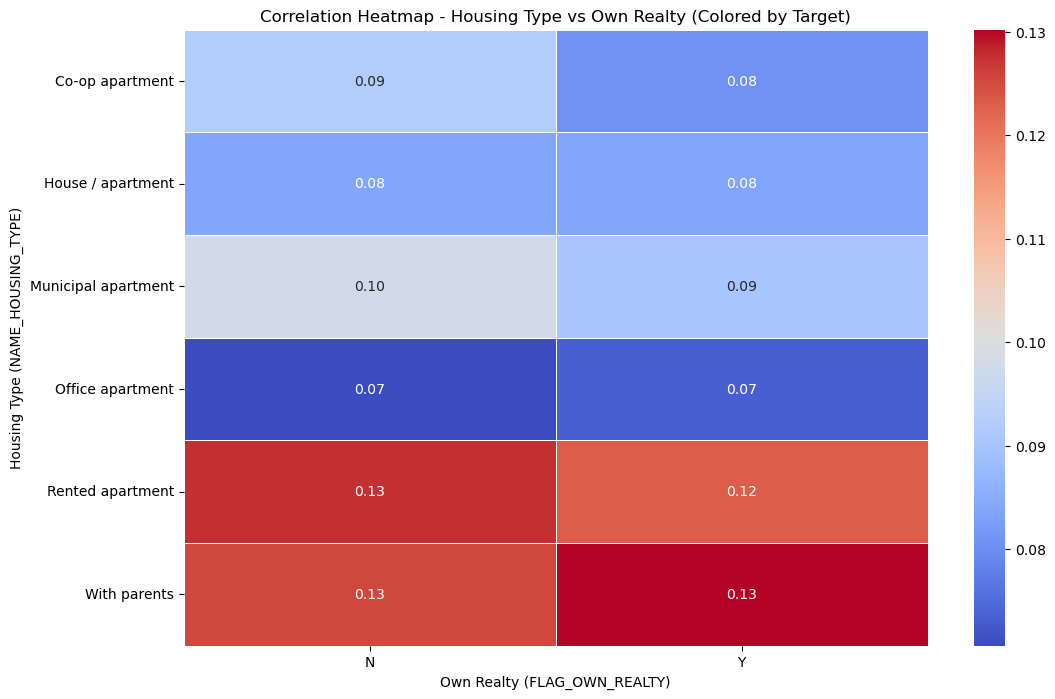

In [52]:
# Create a pivot table for better visualization
pivot_table = pd.pivot_table(merged_data, values='TARGET', index='NAME_HOUSING_TYPE', columns='FLAG_OWN_REALTY', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set plot labels and title
plt.title('Correlation Heatmap - Housing Type vs Own Realty (Colored by Target)')
plt.xlabel('Own Realty (FLAG_OWN_REALTY)')
plt.ylabel('Housing Type (NAME_HOUSING_TYPE)')

# Show the plot
plt.show()
